![grafik.png](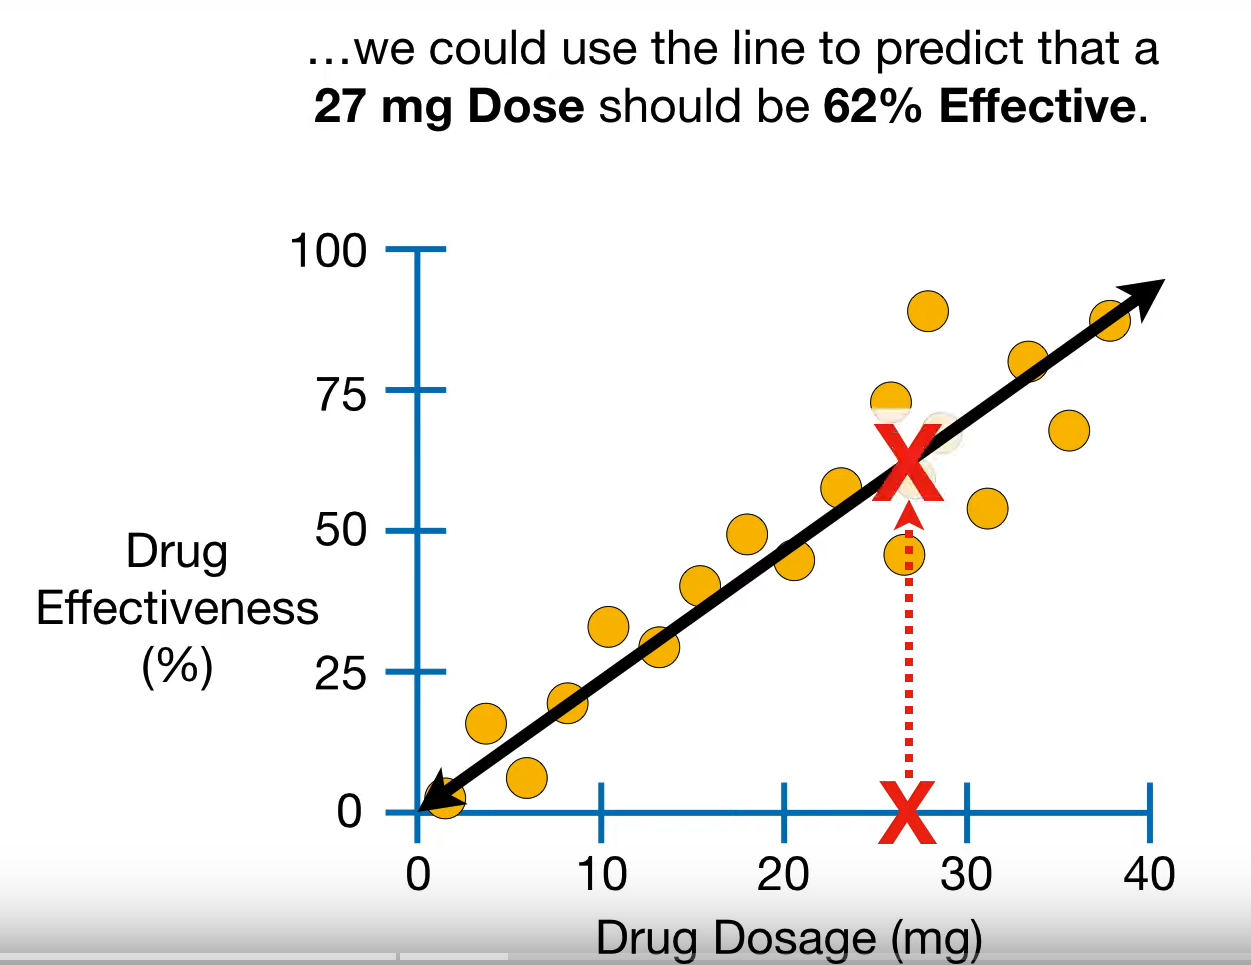![Bildschirmfoto vom 2023-12-20 16-26-57.png](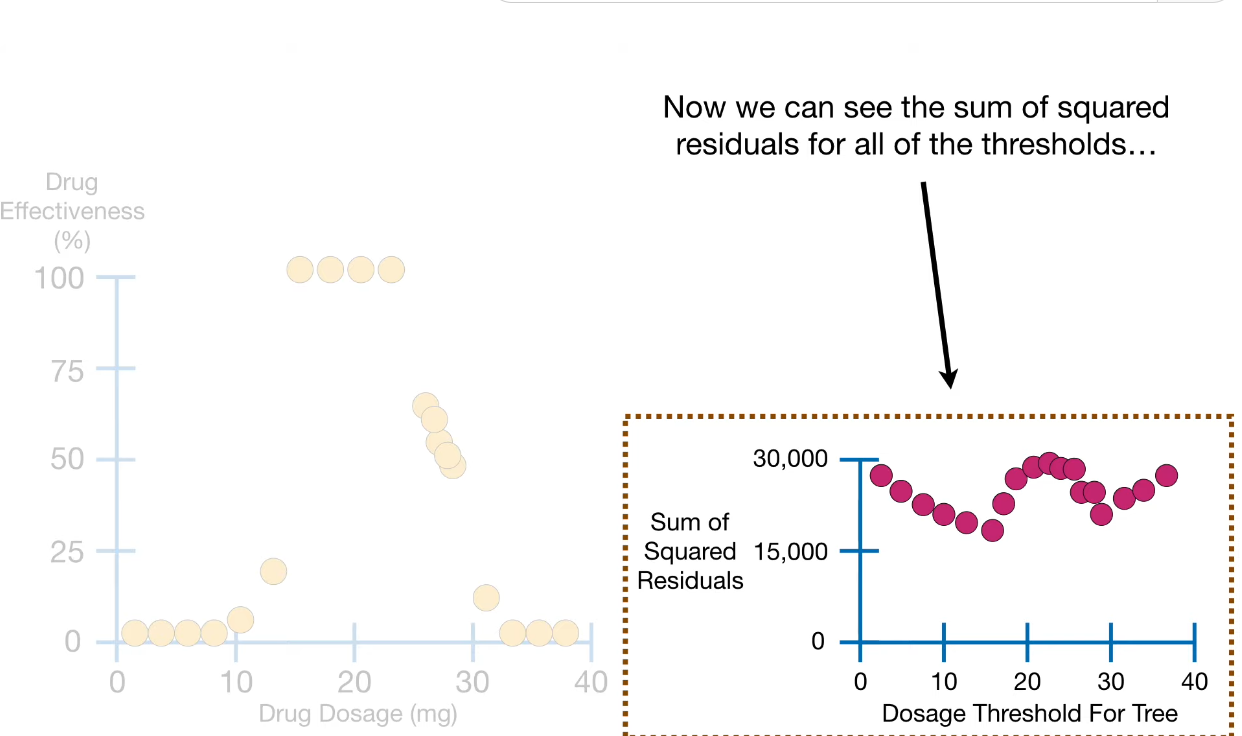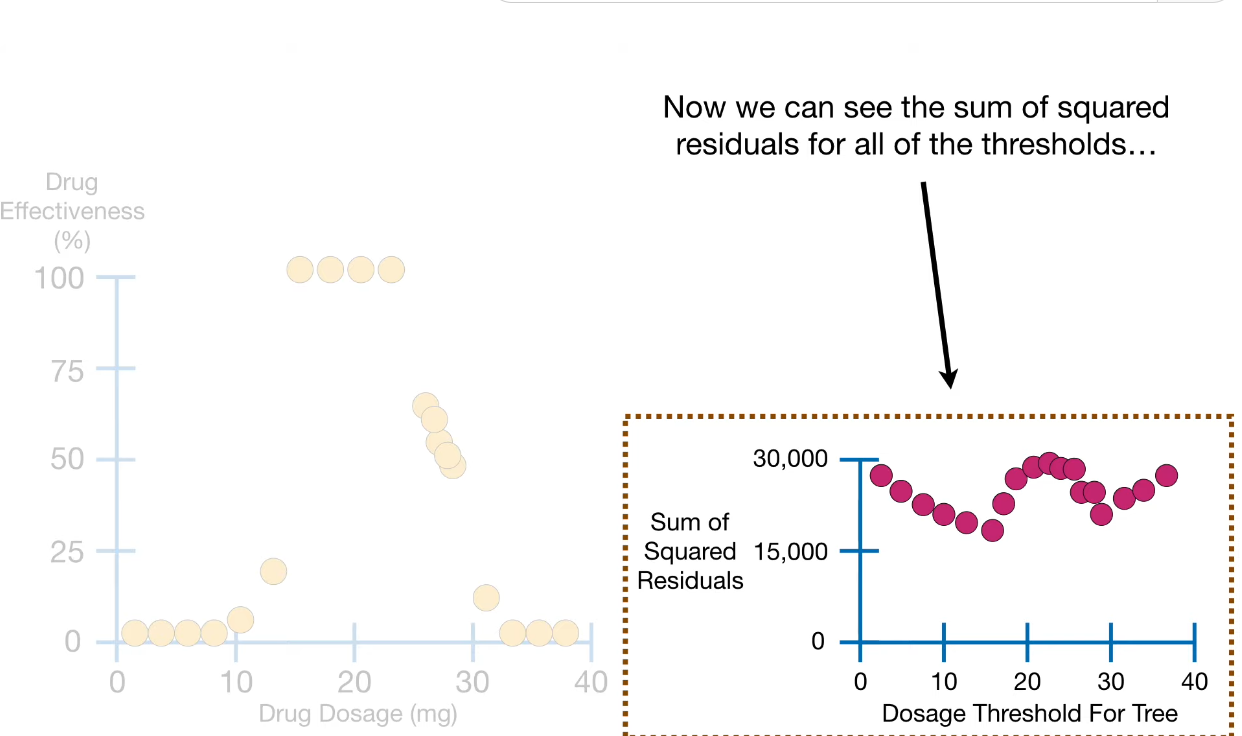))

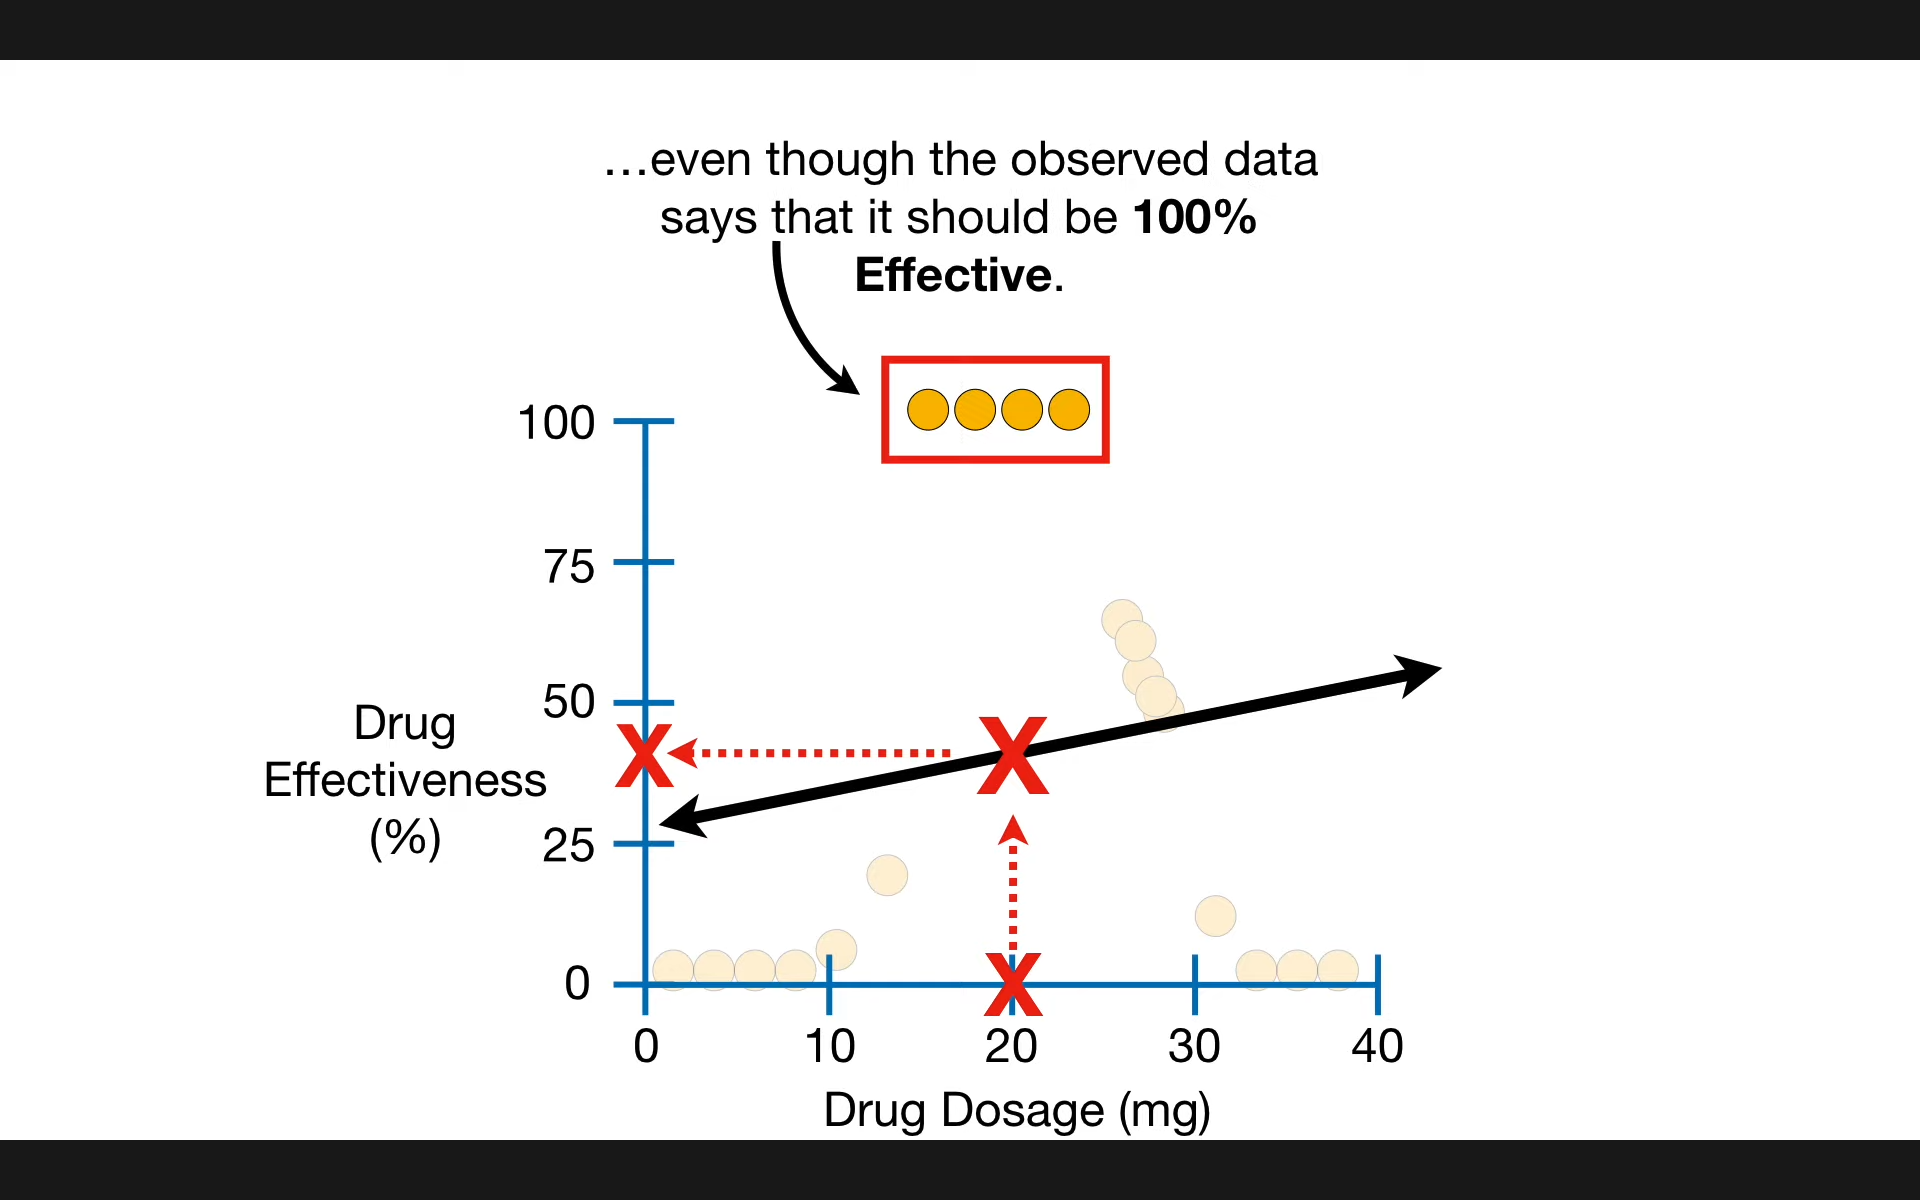

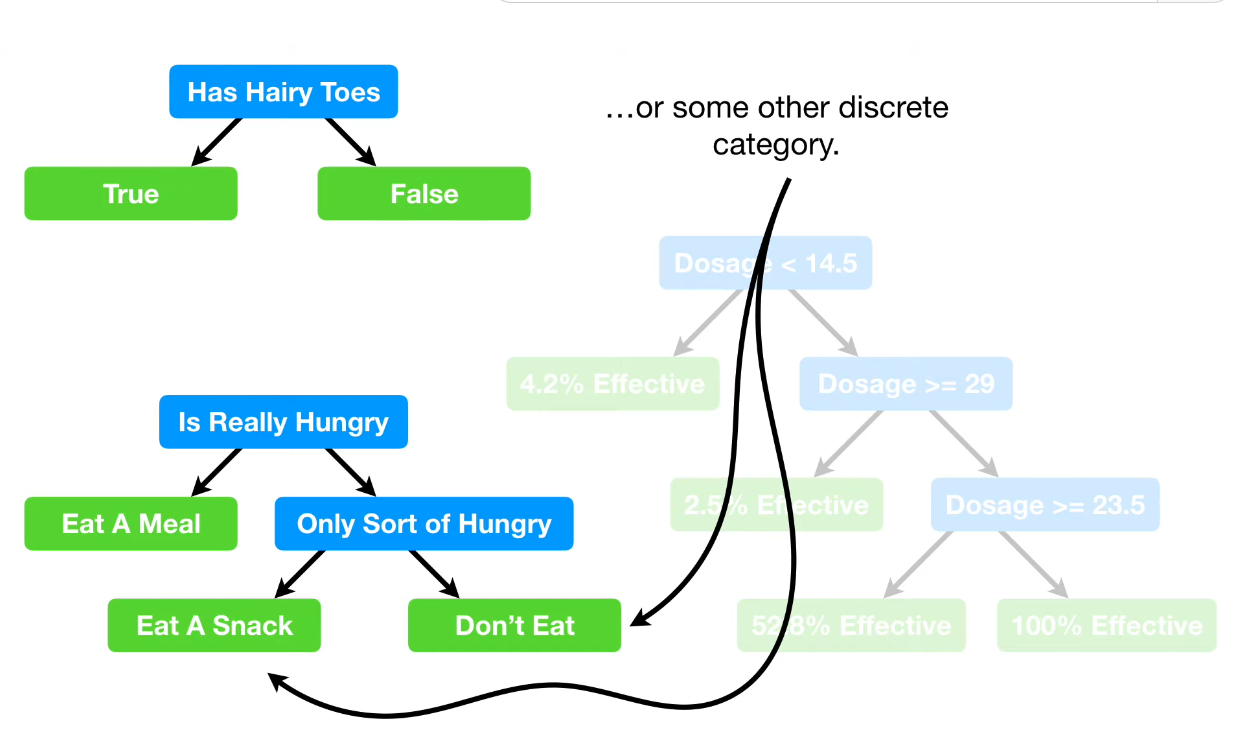

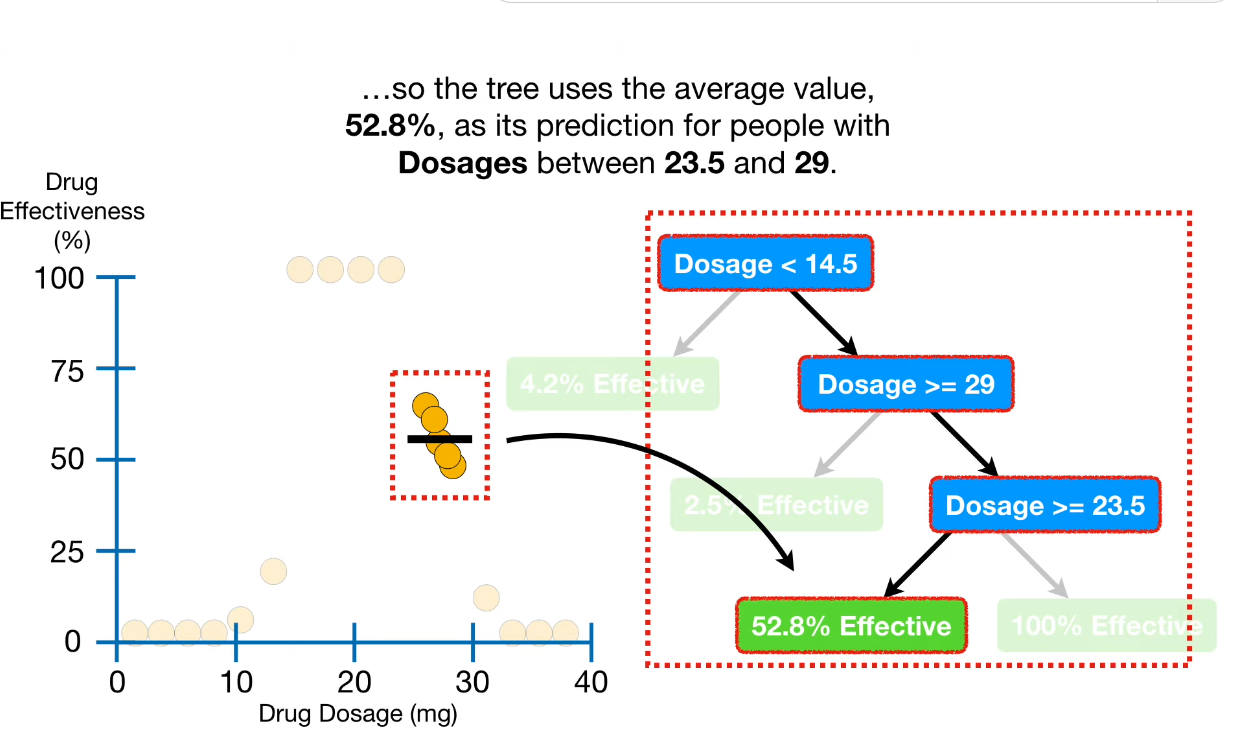

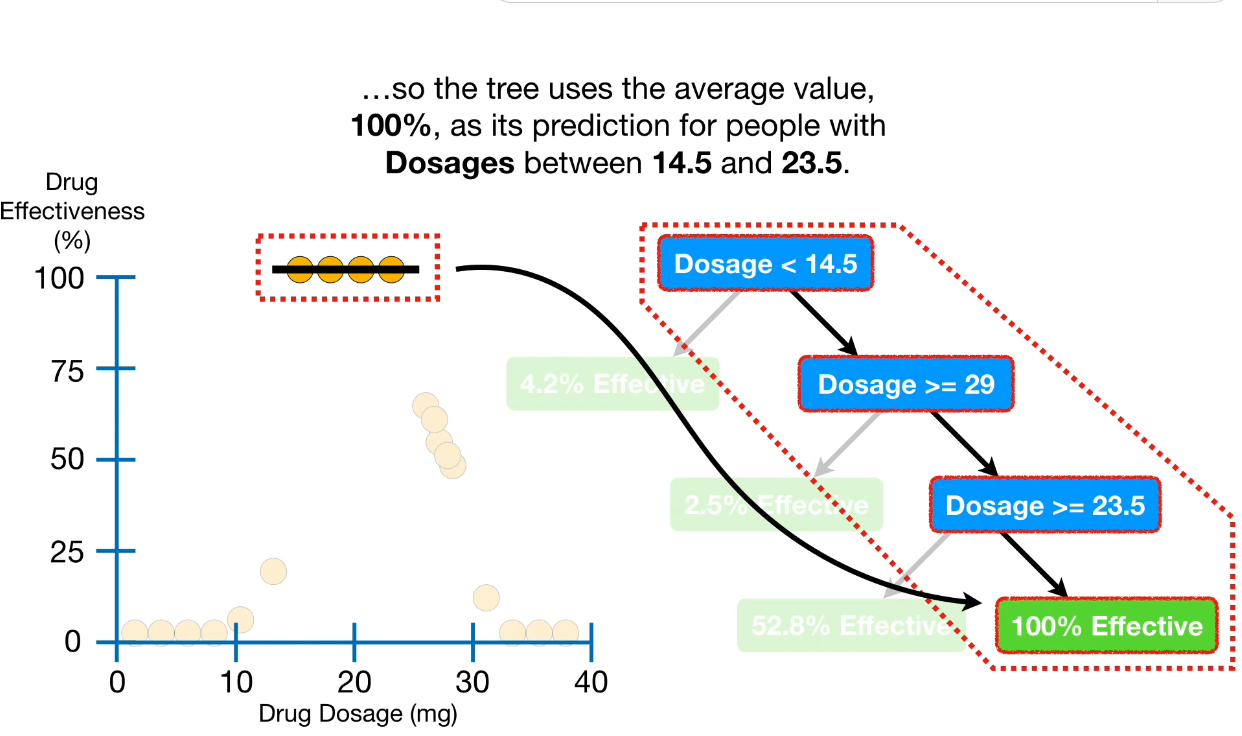

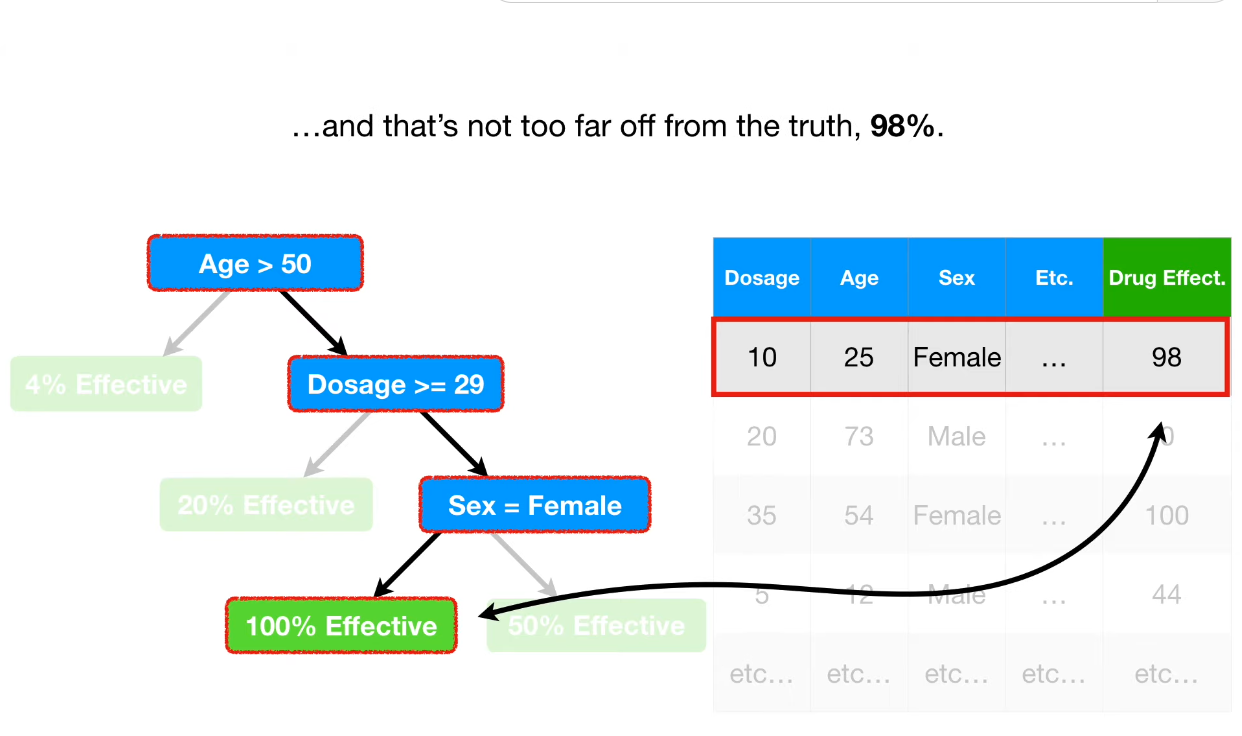

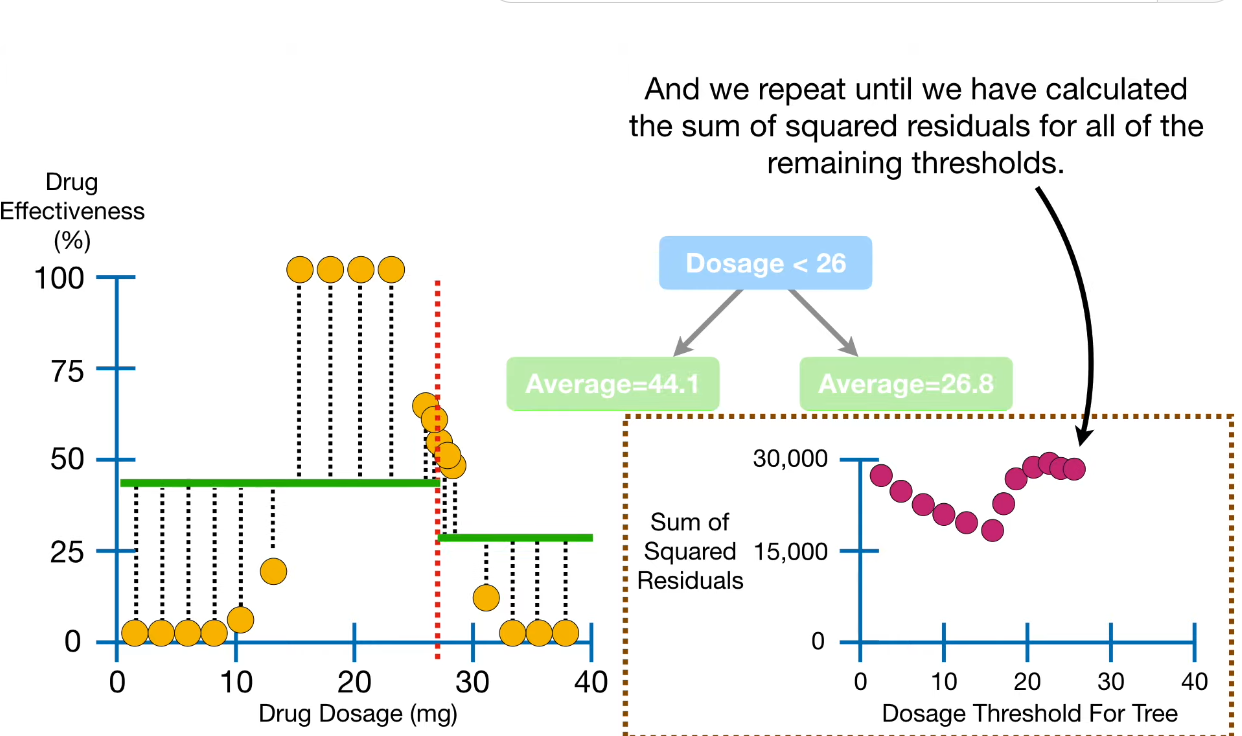

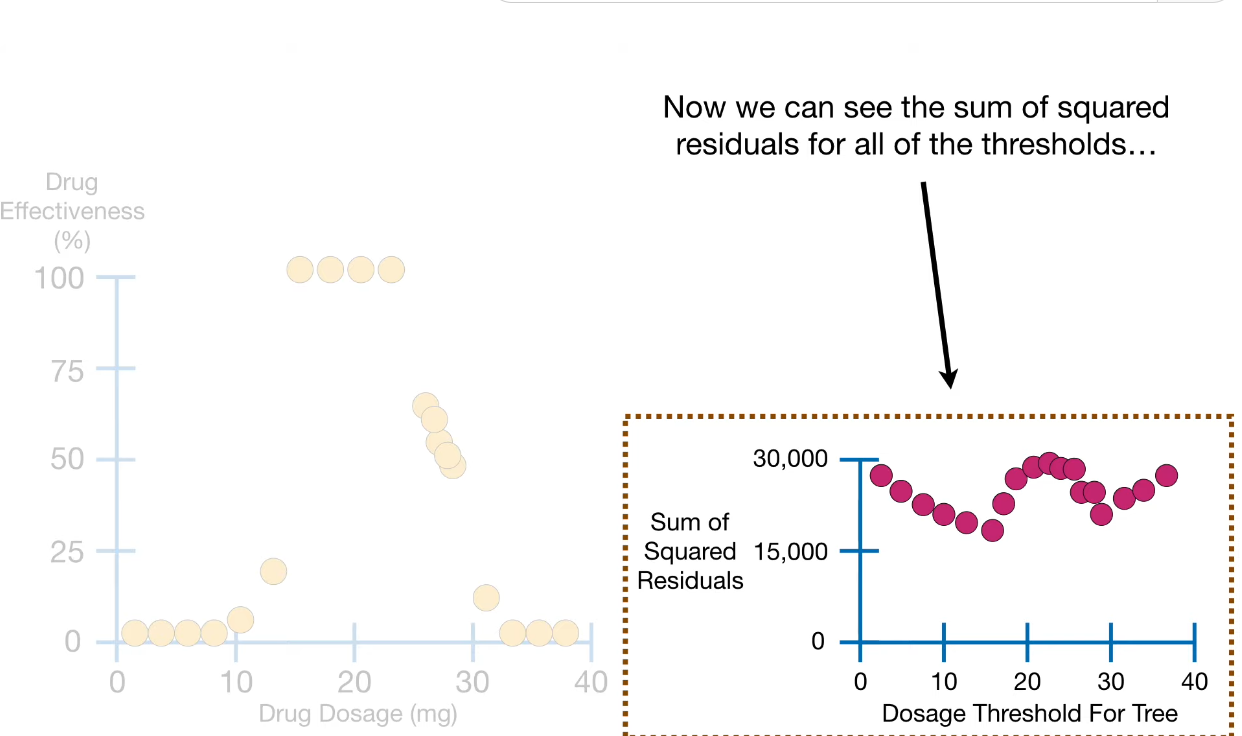

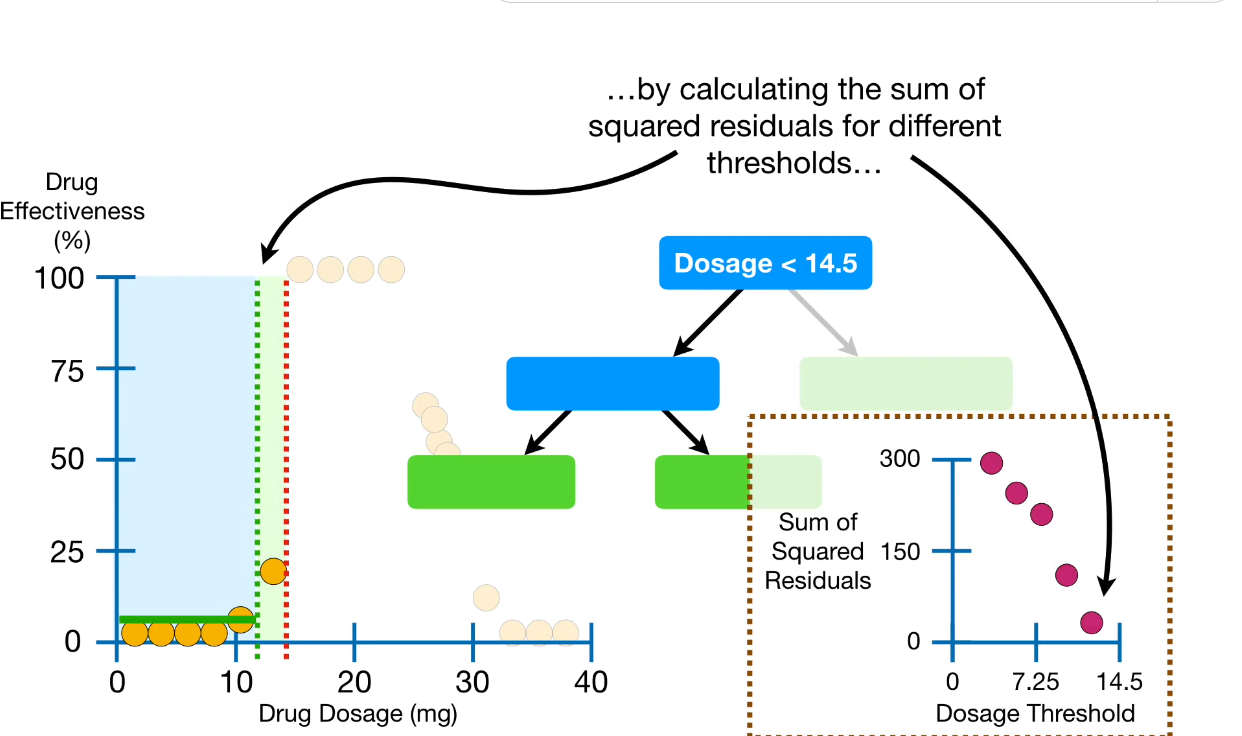

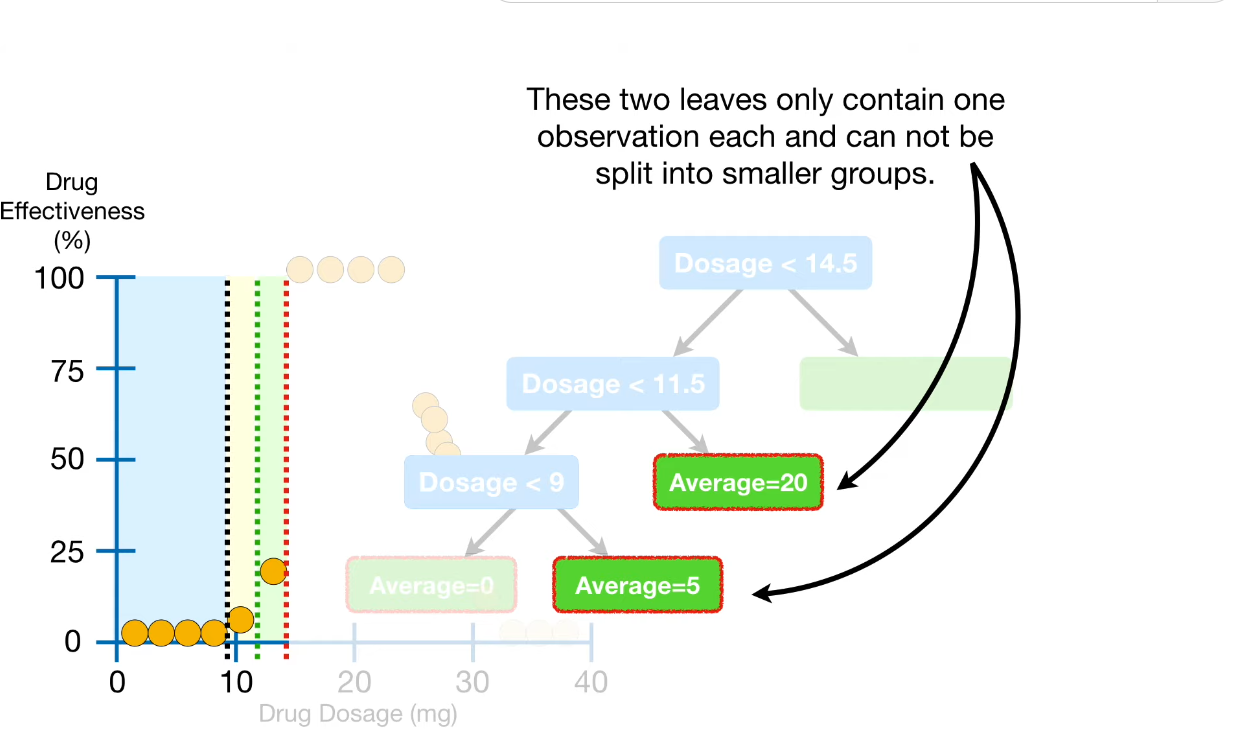

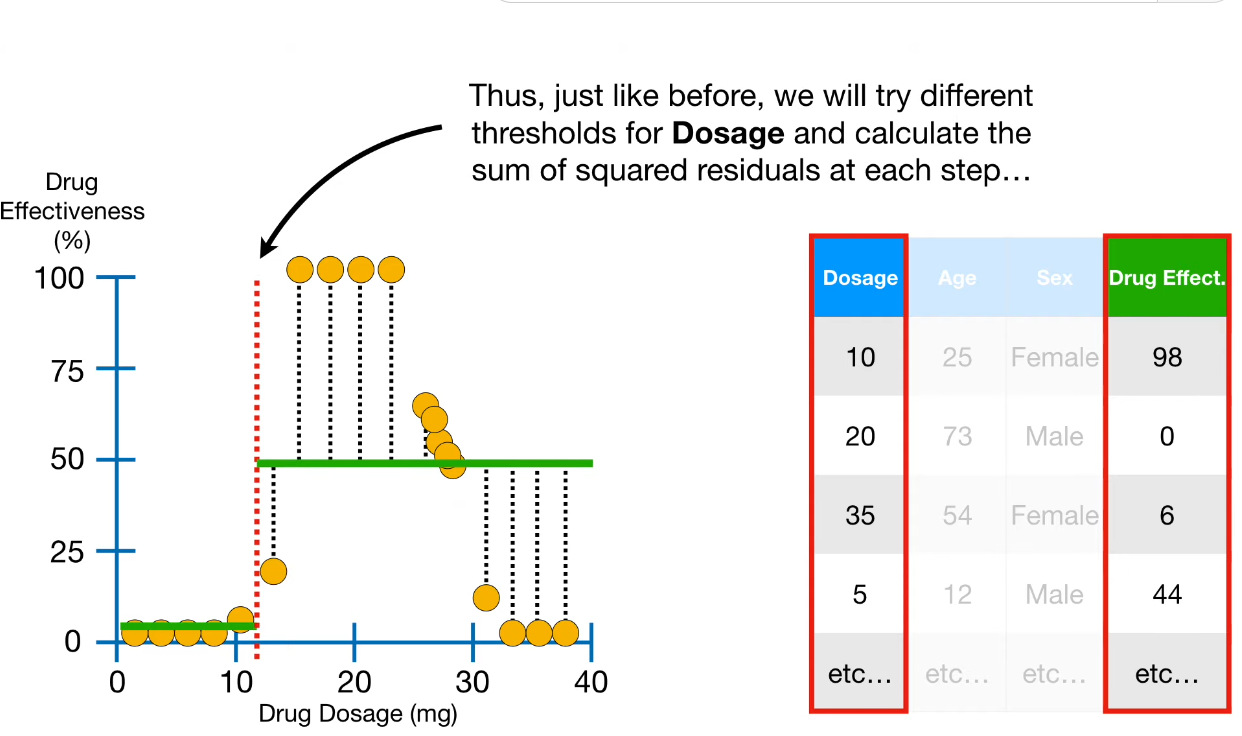

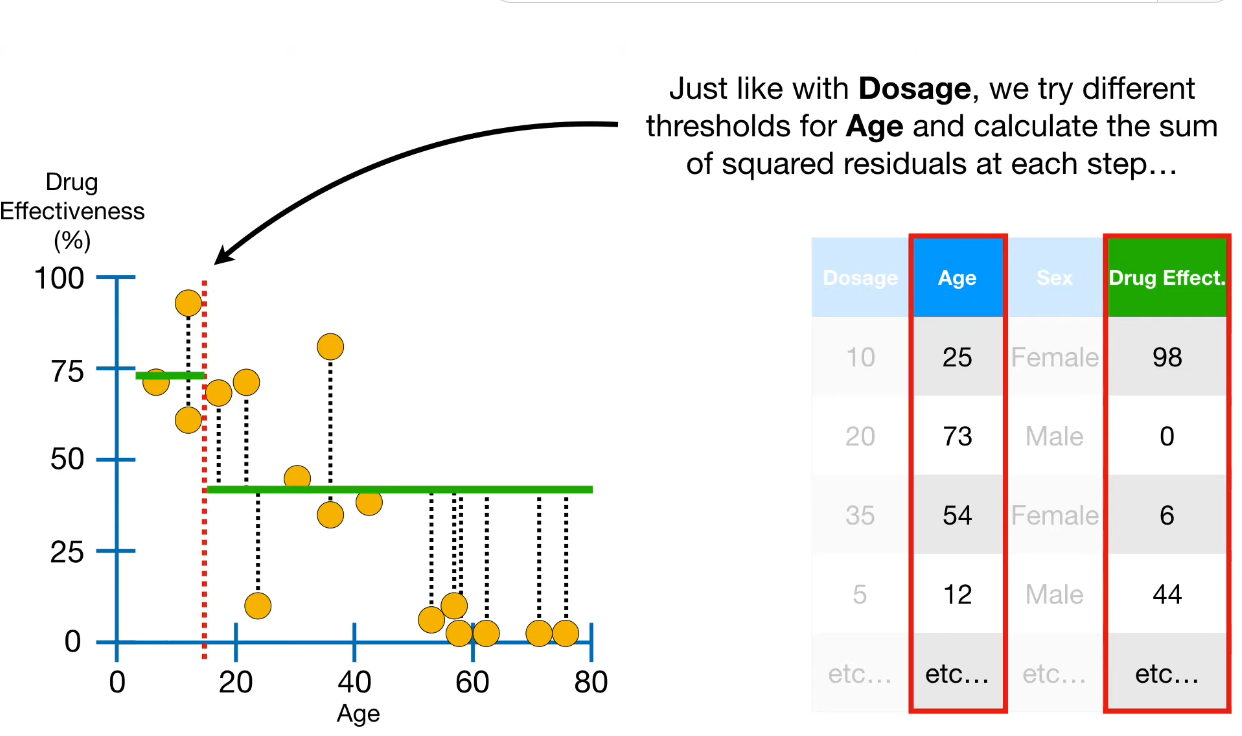

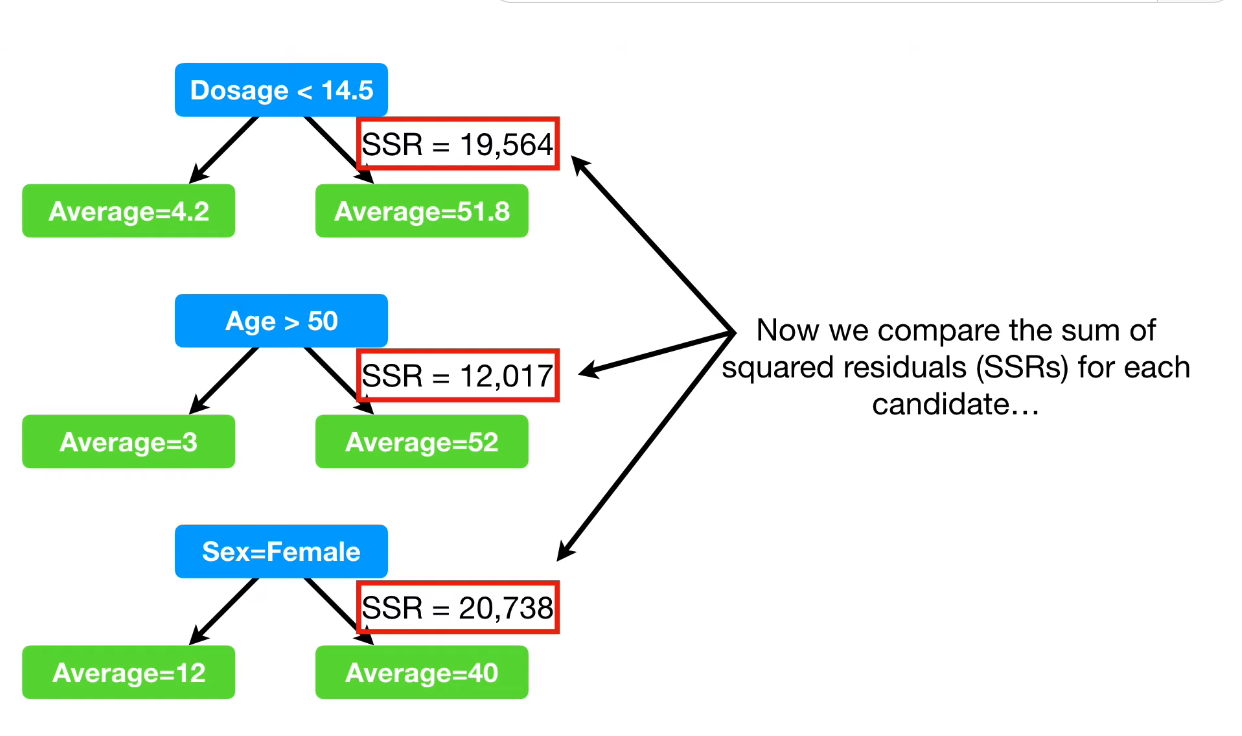

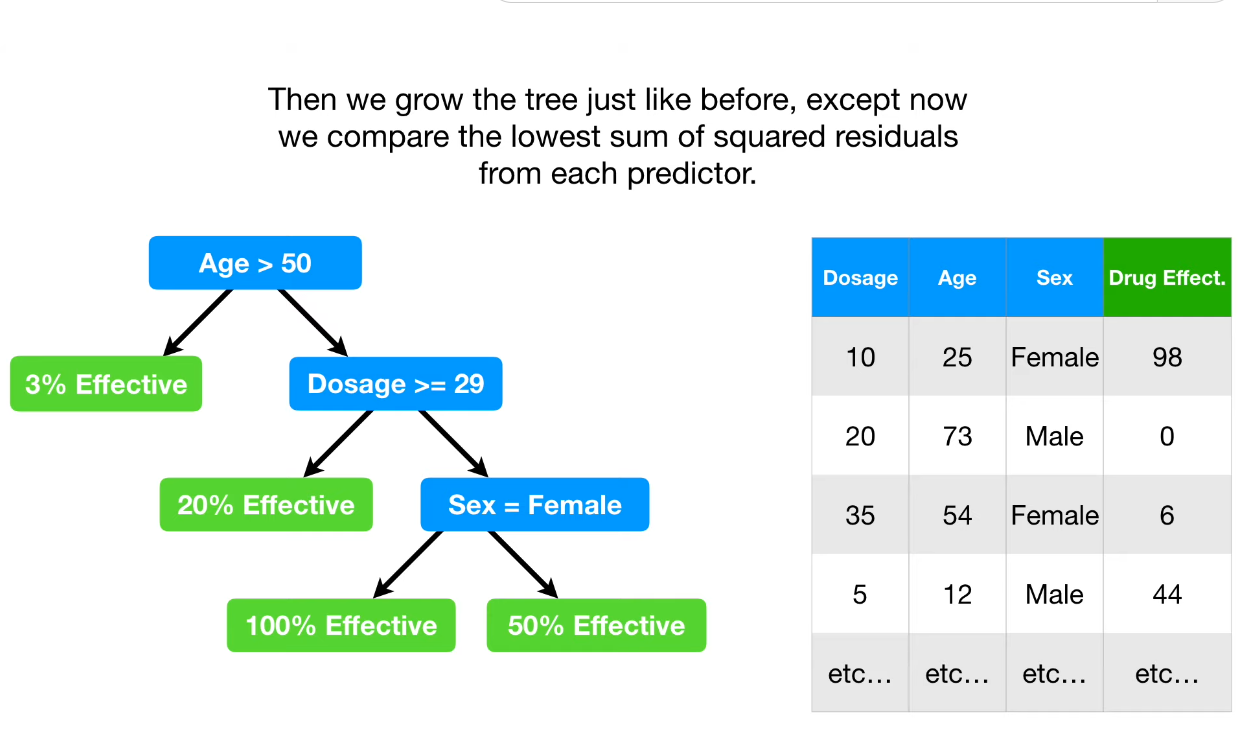

The data comes from a bike-sharing company.

You can download the data from the UCI machine learning archives over here:

https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset.

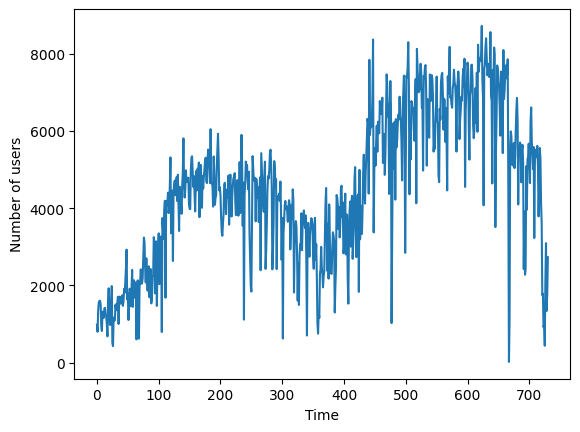

In [ ]:
#Import the bike data

import pandas as pd
import matplotlib.pyplot as plt

#https://github.com/kboroz/TimeSeriesPredictionWS2023/blob/main/day.csv

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPredictionWS2023/main/day.csv'
data = pd.read_csv(url)

ax = data['cnt'].plot()
ax.set_ylabel('Number of users')
ax.set_xlabel('Time')
plt.show()

In [ ]:
#Creating the training dataset



# 7 last days of user count (autoregression)
data['usersL1'] = data['cnt'].shift(1)
data['usersL2'] = data['cnt'].shift(2)
data['usersL3'] = data['cnt'].shift(3)
data['usersL4'] = data['cnt'].shift(4)
data['usersL5'] = data['cnt'].shift(5)
data['usersL6'] = data['cnt'].shift(6)
data['usersL7'] = data['cnt'].shift(7)

# 7 last days of weathersit
data['weatherL1'] = data['weathersit'].shift(1)
data['weatherL2'] = data['weathersit'].shift(2)
data['weatherL3'] = data['weathersit'].shift(3)
data['weatherL4'] = data['weathersit'].shift(4)
data['weatherL5'] = data['weathersit'].shift(5)
data['weatherL6'] = data['weathersit'].shift(6)
data['weatherL7'] = data['weathersit'].shift(7)

# 7 last days of temperature
data['tempL1'] = data['temp'].shift(1)
data['tempL2'] = data['temp'].shift(2)
data['tempL3'] = data['temp'].shift(3)
data['tempL4'] = data['temp'].shift(4)
data['tempL5'] = data['temp'].shift(5)
data['tempL6'] = data['temp'].shift(6)
data['tempL7'] = data['temp'].shift(7)

# 7 last days of humidity
data['humL1'] = data['hum'].shift(1)
data['humL2'] = data['hum'].shift(2)
data['humL3'] = data['hum'].shift(3)
data['humL4'] = data['hum'].shift(4)
data['humL5'] = data['hum'].shift(5)
data['humL6'] = data['hum'].shift(6)
data['humL7'] = data['hum'].shift(7)

data = data.dropna()
data = data.drop(477)

X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
          'weatherL1', 'weatherL2', 'weatherL3', 'weatherL4', 'weatherL5', 'weatherL6', 'weatherL7',
         'usersL1','usersL2', 'usersL3', 'usersL4', 'usersL5', 'usersL6', 'usersL7',
         'tempL1', 'tempL2', 'tempL3', 'tempL4', 'tempL5', 'tempL6', 'tempL7',
         'humL1', 'humL2','humL3', 'humL4', 'humL5', 'humL6', 'humL7']]

y = data['cnt']



In [ ]:
#Fitting the model

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)

from sklearn.tree import DecisionTreeRegressor
my_dt = DecisionTreeRegressor(random_state=12345)
my_dt.fit(X_train, y_train)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(my_dt.predict(X_test))))

0.16582718614044134


In [ ]:
#Adding a grid search

from sklearn.model_selection import GridSearchCV

my_dt = GridSearchCV(DecisionTreeRegressor(random_state=44),
                 {'min_samples_split': list(range(20,50, 2)),
                 'max_features': [0.6, 0.7, 0.8, 0.9, 1.],
                 'criterion': ['squared_error', 'absolute_error']},
                scoring = 'r2', n_jobs = -1)

my_dt.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_dt.predict(X_test))))

0.5545378076277191


In [ ]:
#Finding the best parameters

print(my_dt.best_estimator_)

DecisionTreeRegressor(criterion='absolute_error', max_features=0.8,
                      min_samples_split=48, random_state=44)


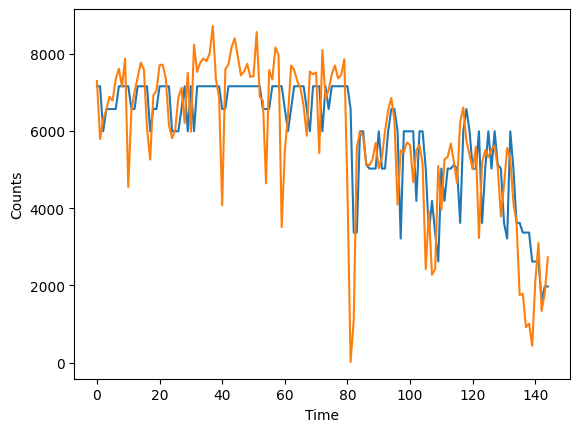

In [ ]:
#Plotting the prediction

fcst = my_dt.predict(X_test)

plt.plot(list(fcst))
plt.plot(list(y_test))
plt.ylabel('Counts')
plt.xlabel('Time')
plt.show()